# 

# Import Libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.20.3
Pandas Version 1.3.4
Seaborn Version 0.11.2
Matplotlib Version 3.4.3


# Import Data

In [3]:
df = pd.read_excel('Vehicle_01.xlsx',sheet_name=0)

# Data Info - Types of Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Compactness               846 non-null    int64 
 1    Circularity              846 non-null    int64 
 2    Distance_circularity     846 non-null    int64 
 3    Radius_ratio             846 non-null    int64 
 4    Praxis_aspect_ratio      846 non-null    int64 
 5    Max_length_aspect_ratio  846 non-null    int64 
 6    Scatter_ratio            846 non-null    int64 
 7    Elongatedness            846 non-null    int64 
 8    Praxis_rectangular       846 non-null    int64 
 9    Length_rectangular       846 non-null    int64 
 10   Major_variance           846 non-null    int64 
 11   Minor_variance           846 non-null    int64 
 12   Gyration_radius          846 non-null    int64 
 13   Major_skewness           846 non-null    int64 
 14   Minor_skewness           

# Data Head

In [5]:
df.head()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,85,45,80,154,64,9,147,45,19,148,169,324,174,71,1,4,188,199,positive
1,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198,negative
2,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199,negative
3,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188,positive
4,100,58,109,230,70,11,226,30,25,182,234,752,207,72,0,13,187,198,negative


In [6]:
df

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio,Class
0,85,45,80,154,64,9,147,45,19,148,169,324,174,71,1,4,188,199,positive
1,93,35,78,162,60,8,150,45,19,125,172,331,137,67,2,33,191,198,negative
2,108,49,109,204,61,11,212,31,24,159,229,665,215,71,16,11,190,199,negative
3,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188,positive
4,100,58,109,230,70,11,226,30,25,182,234,752,207,72,0,13,187,198,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,80,43,71,133,60,7,150,45,19,146,170,330,176,81,6,15,180,184,negative
842,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,negative
843,109,49,103,186,57,11,206,32,23,156,212,630,186,65,12,21,192,201,negative
844,90,40,83,178,61,8,178,37,21,132,199,472,157,71,1,14,187,193,negative


In [7]:
df.describe()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


# Check the shape of the data

In [8]:
print("The number of rows(observations) is",df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows(observations) is 846 
The number of columns (variables) is 19


# Measures of Central Tendency

In [9]:
df.describe()

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [10]:
pd.set_option('max_rows', None)
pd.options.display.float_format = '{:.2f}'.format
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Compactness,846.00,NaN,NaN,NaN,93.68,8.23,73.00,87.00,93.00,100.00,119.00
Circularity,846.00,NaN,NaN,NaN,44.86,6.17,33.00,40.00,44.00,49.00,59.00
Distance_circularity,846.00,NaN,NaN,NaN,82.09,15.77,40.00,70.00,80.00,98.00,112.00
Radius_ratio,846.00,NaN,NaN,NaN,168.94,33.47,104.00,141.00,167.00,195.00,333.00
Praxis_aspect_ratio,846.00,NaN,NaN,NaN,61.69,7.89,47.00,57.00,61.00,65.00,138.00
Max_length_aspect_ratio,846.00,NaN,NaN,NaN,8.57,4.60,2.00,7.00,8.00,10.00,55.00
Scatter_ratio,846.00,NaN,NaN,NaN,168.84,33.24,112.00,146.25,157.00,198.00,265.00
Elongatedness,846.00,NaN,NaN,NaN,40.93,7.81,26.00,33.00,43.00,46.00,61.00
Praxis_rectangular,846.00,NaN,NaN,NaN,20.58,2.59,17.00,19.00,20.00,23.00,29.00
Length_rectangular,846.00,NaN,NaN,NaN,148.00,14.52,118.00,137.00,146.00,159.00,188.00


In [11]:
df.describe(include='object')

,Class
count,846
unique,2
top,negative
freq,647


# Outlier Detection and Treatment

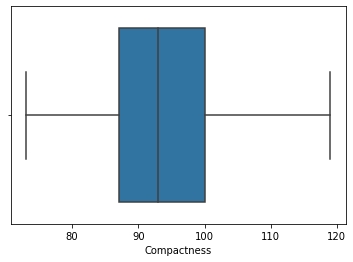

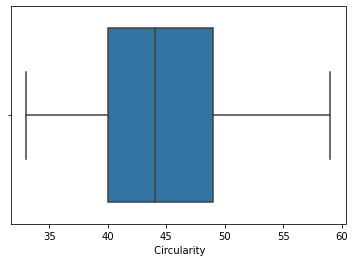

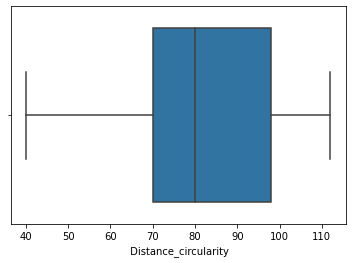

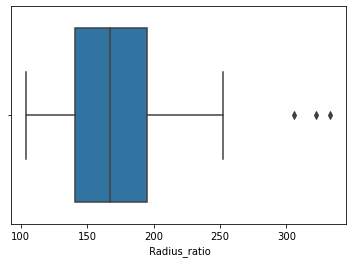

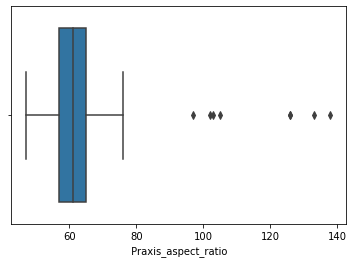

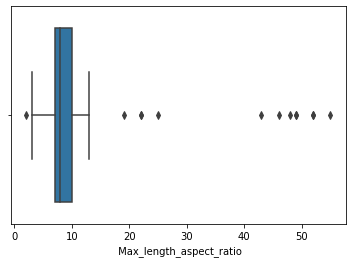

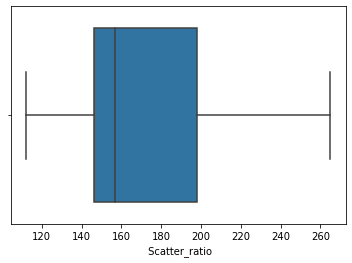

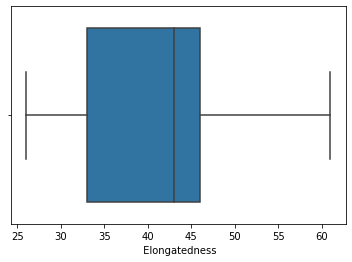

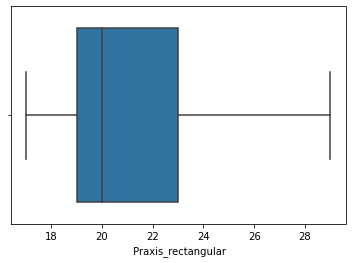

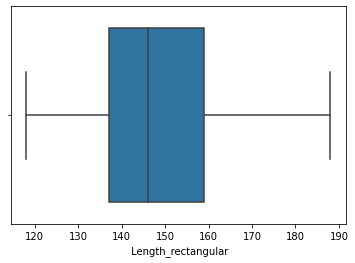

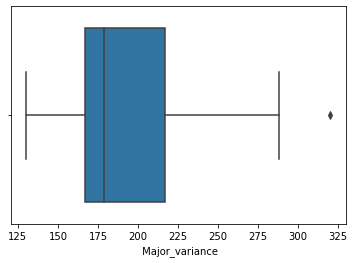

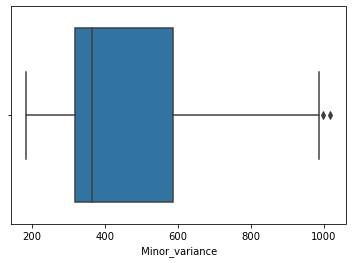

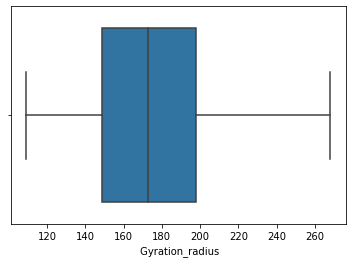

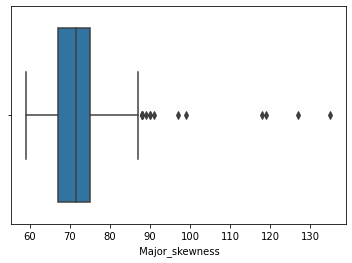

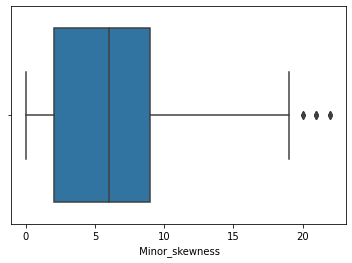

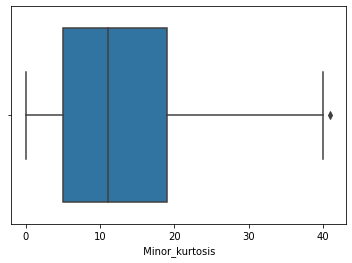

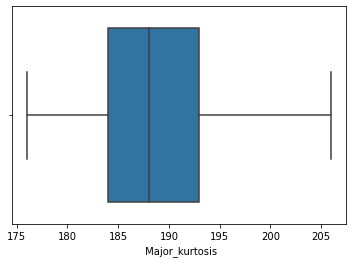

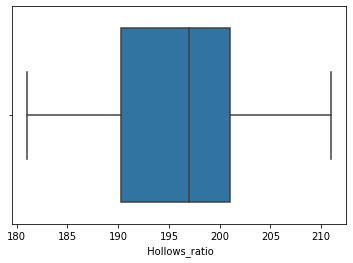

In [12]:
col_names = list(df.select_dtypes(exclude=['object']).columns)
#fig, ax = plt.subplots(len(col_names), figsize=(5,50))
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    plt.show()

# Outlier Treatment

In [13]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [14]:
for i,col_val in enumerate(col_names):
    lwr,upr=remove_outlier(df[col_val])
    df[col_val]=np.where(df[col_val]>upr,upr,df[col_val])
    df[col_val]=np.where(df[col_val]<lwr,lwr,df[col_val])
    print("Outlier fixed for ", col_val)

Outlier fixed for  Compactness
Outlier fixed for   Circularity
Outlier fixed for   Distance_circularity
Outlier fixed for   Radius_ratio
Outlier fixed for   Praxis_aspect_ratio
Outlier fixed for   Max_length_aspect_ratio
Outlier fixed for   Scatter_ratio
Outlier fixed for   Elongatedness
Outlier fixed for   Praxis_rectangular
Outlier fixed for   Length_rectangular
Outlier fixed for   Major_variance
Outlier fixed for   Minor_variance
Outlier fixed for   Gyration_radius
Outlier fixed for   Major_skewness
Outlier fixed for   Minor_skewness
Outlier fixed for   Minor_kurtosis
Outlier fixed for   Major_kurtosis
Outlier fixed for   Hollows_ratio


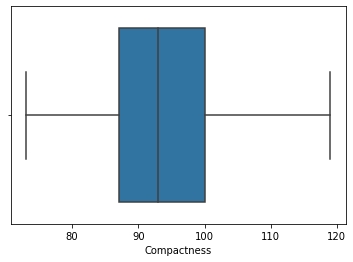

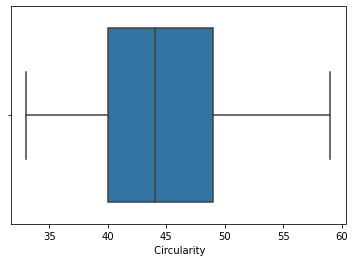

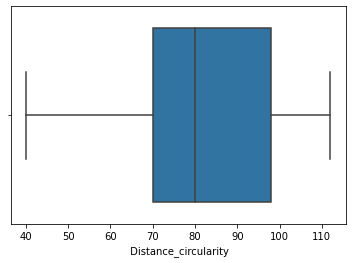

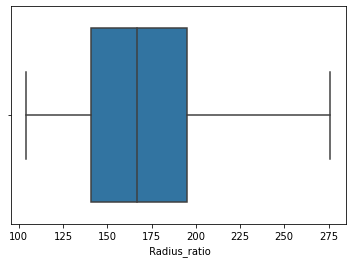

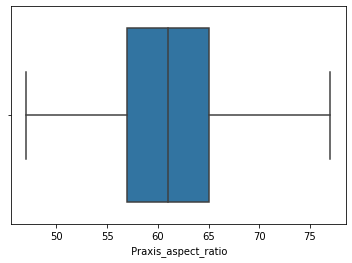

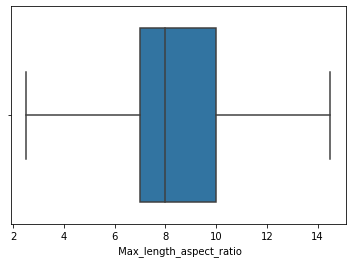

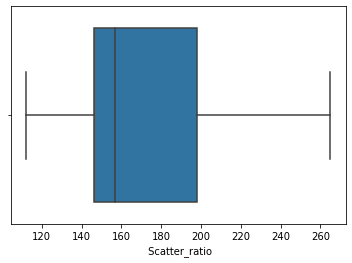

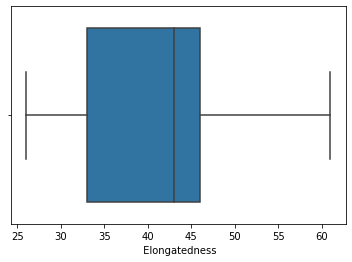

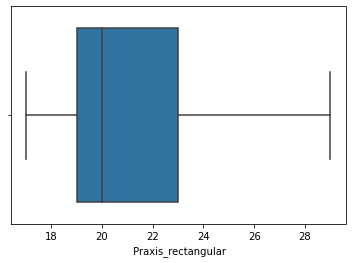

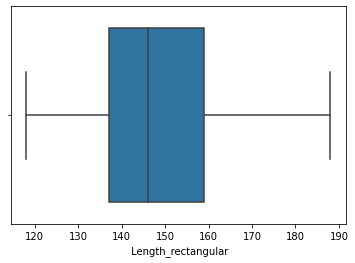

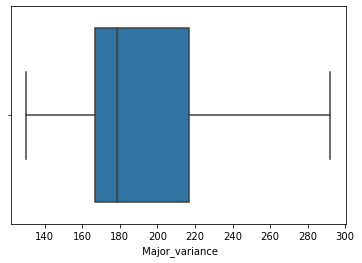

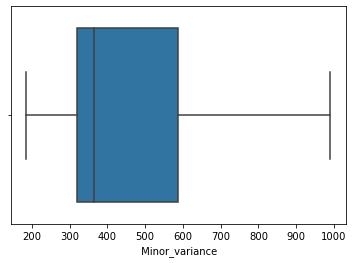

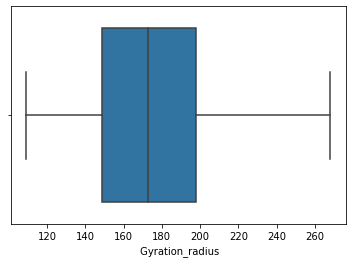

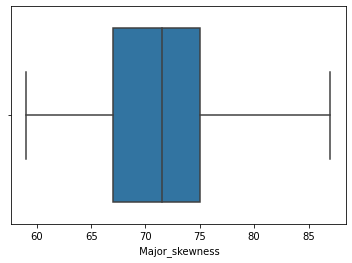

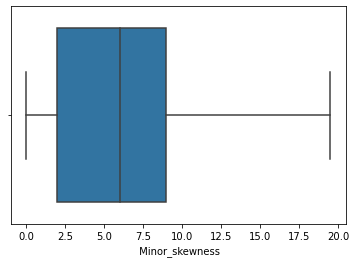

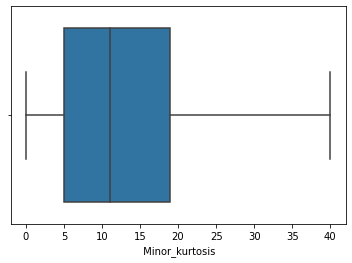

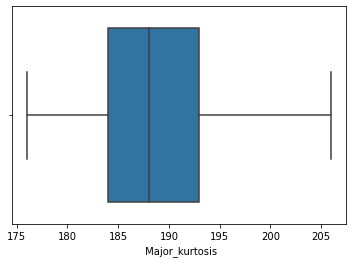

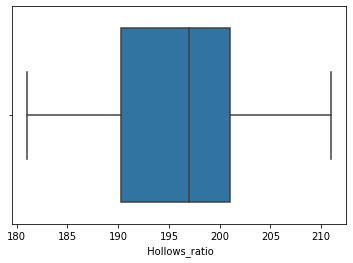

In [15]:
for i,col_val in enumerate(col_names):
    sns.boxplot(df[col_val])
    plt.show()

# Uni Variate Analysis

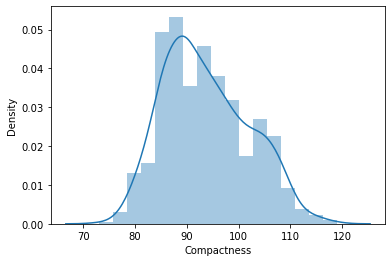

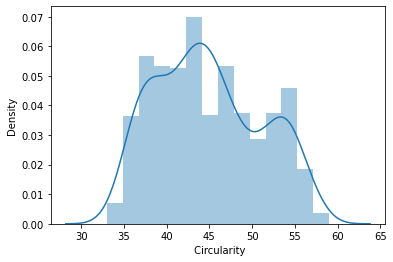

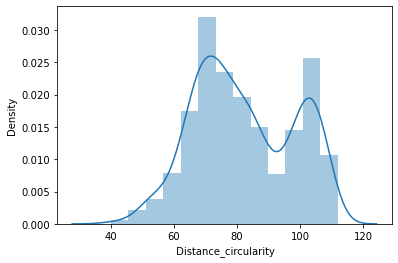

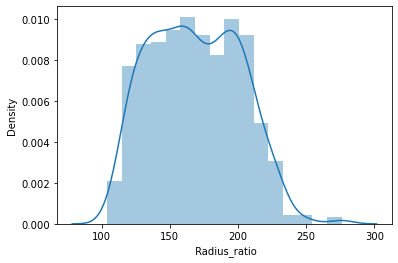

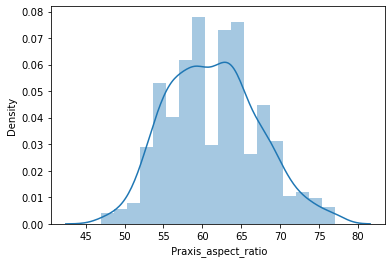

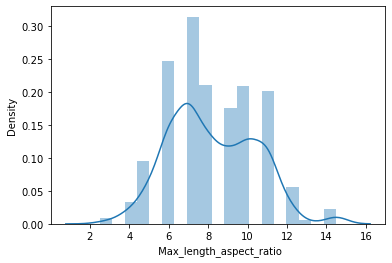

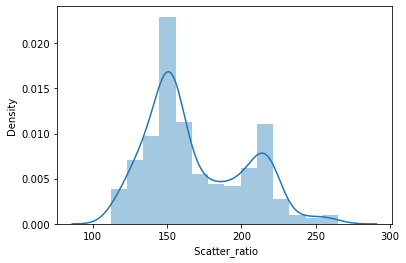

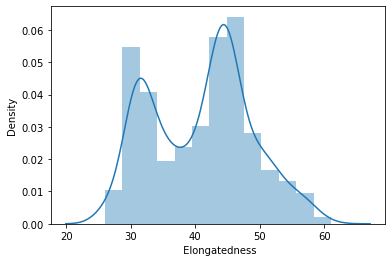

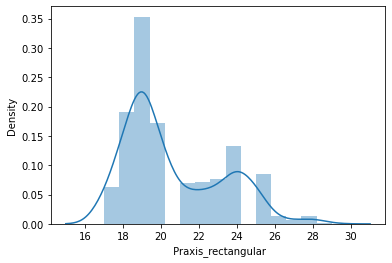

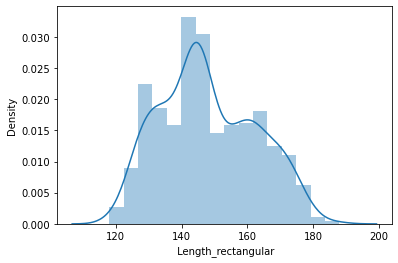

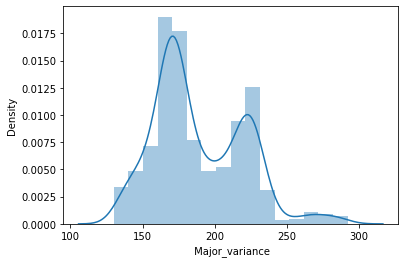

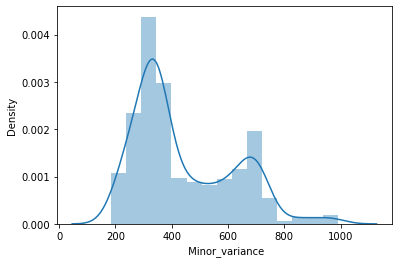

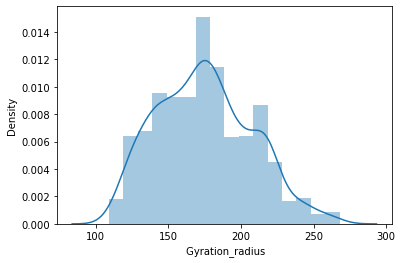

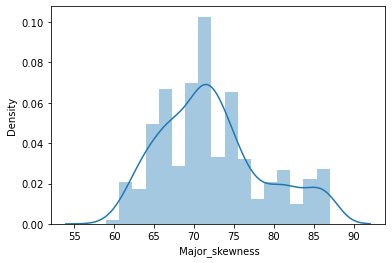

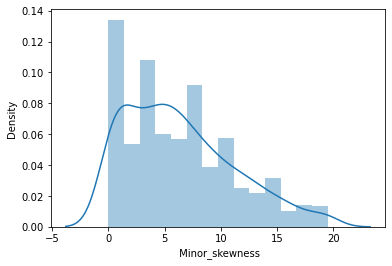

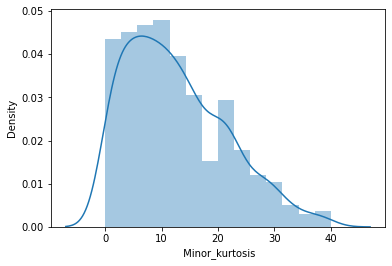

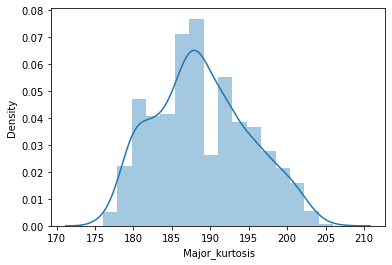

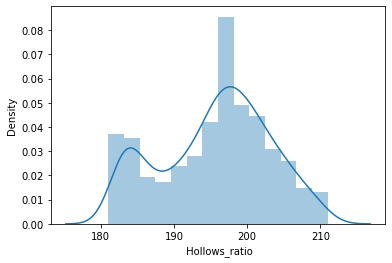

In [16]:
for i,col_val in enumerate(col_names):
    sns.distplot(df[col_val])
    plt.show()

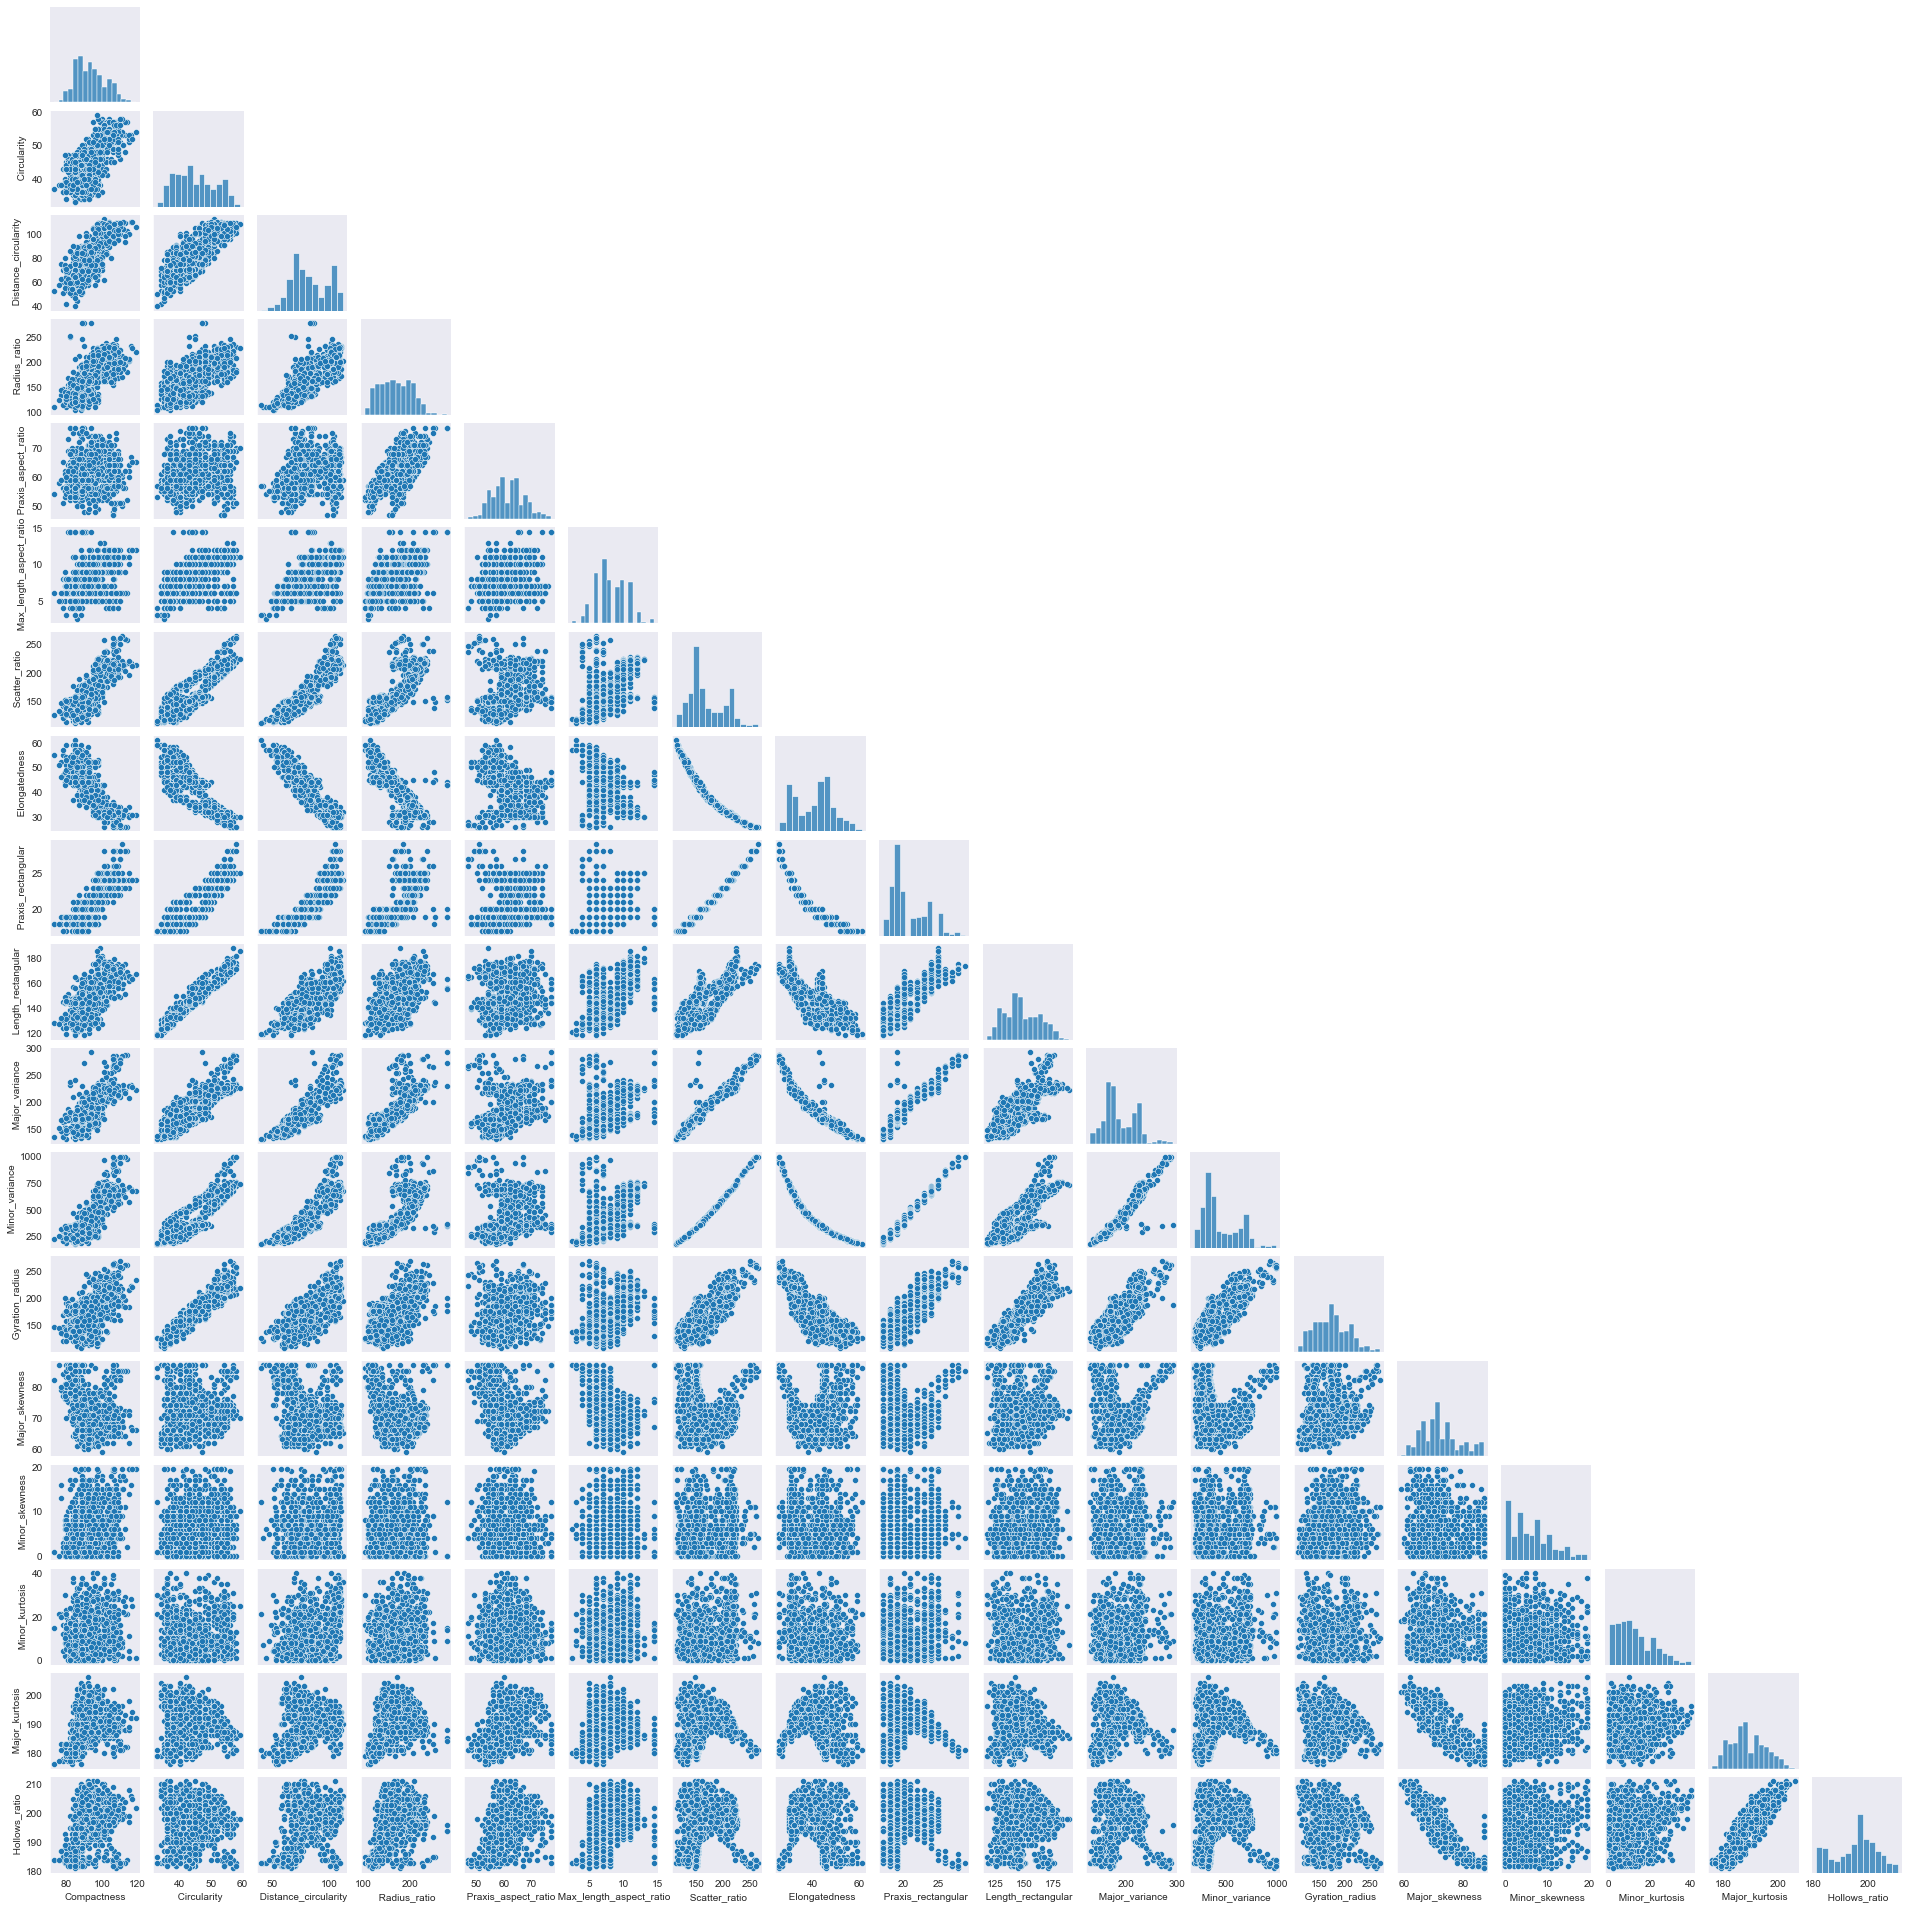

In [17]:
sns.set_style("dark")
sns.pairplot(df,height=1.5,aspect=1,corner=True)

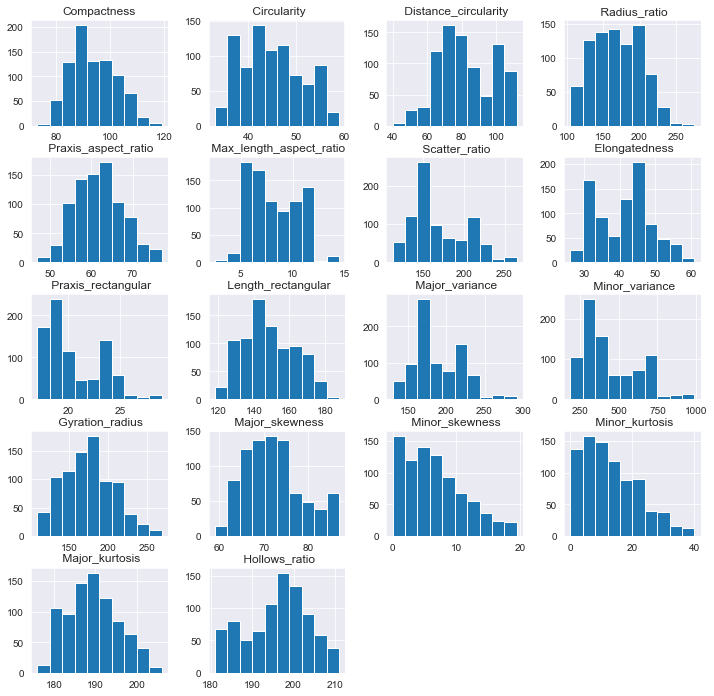

In [18]:
df.hist(figsize=(12,12))
plt.show()

# Correlation

In [19]:
corr = df.corr()
corr

,Compactness,Circularity,Distance_circularity,Radius_ratio,Praxis_aspect_ratio,Max_length_aspect_ratio,Scatter_ratio,Elongatedness,Praxis_rectangular,Length_rectangular,Major_variance,Minor_variance,Gyration_radius,Major_skewness,Minor_skewness,Minor_kurtosis,Major_kurtosis,Hollows_ratio
Compactness,1.00,0.69,0.79,0.71,0.17,0.44,0.81,-0.79,0.81,0.68,0.77,0.82,0.59,-0.27,0.23,0.16,0.30,0.37
Circularity,0.69,1.00,0.80,0.63,0.19,0.52,0.86,-0.83,0.86,0.97,0.81,0.85,0.94,0.06,0.15,-0.02,-0.11,0.04
Distance_circularity,0.79,0.80,1.00,0.79,0.23,0.61,0.91,-0.91,0.90,0.77,0.87,0.89,0.71,-0.25,0.12,0.26,0.15,0.34
Radius_ratio,0.71,0.63,0.79,1.00,0.68,0.49,0.75,-0.81,0.73,0.58,0.80,0.74,0.55,-0.33,0.05,0.18,0.39,0.48
Praxis_aspect_ratio,0.17,0.19,0.23,0.68,1.00,0.23,0.18,-0.28,0.14,0.15,0.24,0.16,0.15,-0.25,-0.05,-0.03,0.37,0.39
Max_length_aspect_ratio,0.44,0.52,0.61,0.49,0.23,1.00,0.44,-0.46,0.44,0.61,0.42,0.40,0.37,-0.26,0.08,0.13,0.05,0.37
Scatter_ratio,0.81,0.86,0.91,0.75,0.18,0.44,1.00,-0.97,0.99,0.81,0.96,1.00,0.80,-0.01,0.07,0.21,0.00,0.12
Elongatedness,-0.79,-0.83,-0.91,-0.81,-0.28,-0.46,-0.97,1.00,-0.95,-0.78,-0.94,-0.96,-0.77,0.10,-0.05,-0.19,-0.11,-0.22
Praxis_rectangular,0.81,0.86,0.90,0.73,0.14,0.44,0.99,-0.95,1.00,0.81,0.94,0.99,0.80,0.00,0.08,0.21,-0.02,0.10
Length_rectangular,0.68,0.97,0.77,0.58,0.15,0.61,0.81,-0.78,0.81,1.00,0.75,0.80,0.87,0.04,0.14,0.00,-0.11,0.08


**HeatMap for the correlation matrix**

<AxesSubplot:>

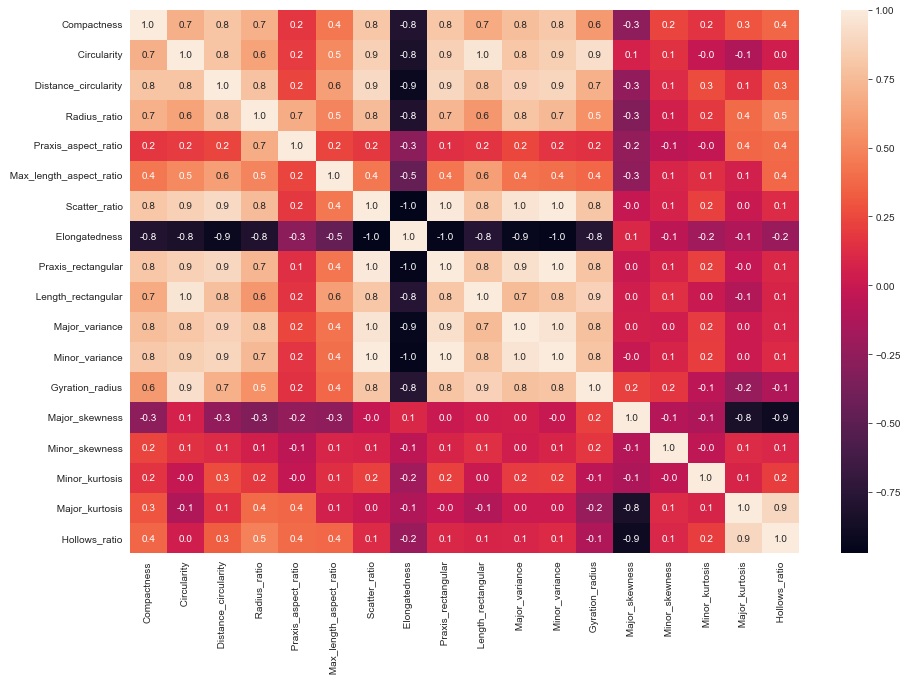

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, fmt=".1f", square=False)

# Classification

In [21]:
x = df.drop("Class",axis=1)
y = df.Class

In [22]:
numeric_pipeline = Pipeline(steps=[("impute",SimpleImputer(strategy="mean")),("scale",StandardScaler())])

In [23]:
num_cols = x.select_dtypes(include="number").columns

In [24]:
full_processor = ColumnTransformer(transformers=[("numeric", numeric_pipeline, num_cols),])

In [25]:
xgb_cl = xgb.XGBClassifier()

In [26]:
X_processed = full_processor.fit_transform(x)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)


X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=42
)

In [27]:
xgb_cl = xgb.XGBClassifier()

xgb_cl.fit(X_train, y_train)

preds = xgb_cl.predict(X_test)

[21:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [28]:
print("The accuracy score is : ",accuracy_score(y_test, preds)*100,"%")

The accuracy score is :  96.22641509433963 %
